In [14]:
from sklearn.metrics import confusion_matrix
from keras.models import load_model

model_h5 = "efficientnetb0.hdf5"
model_path = f"모델/saved_models/{model_h5}"
model = load_model(model_path)  

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = "데이터셋/한국인 감정인식을 위한 복합 영상/최종데이터셋/test"
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',)
    # color_mode='grayscale')

Found 10999 images belonging to 7 classes.


In [16]:
import numpy as np
emotions_korean = ["분노", "슬픔", "불안", "상처", "당황", "기쁨", "중립"]
emotions_english = ["angry", "sad", "anxious", "hurt", "embarrassed", "happy", "neutral"]


predictions = model.predict(test_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_generator.classes

344/344 [==============================] - 25s 70ms/step


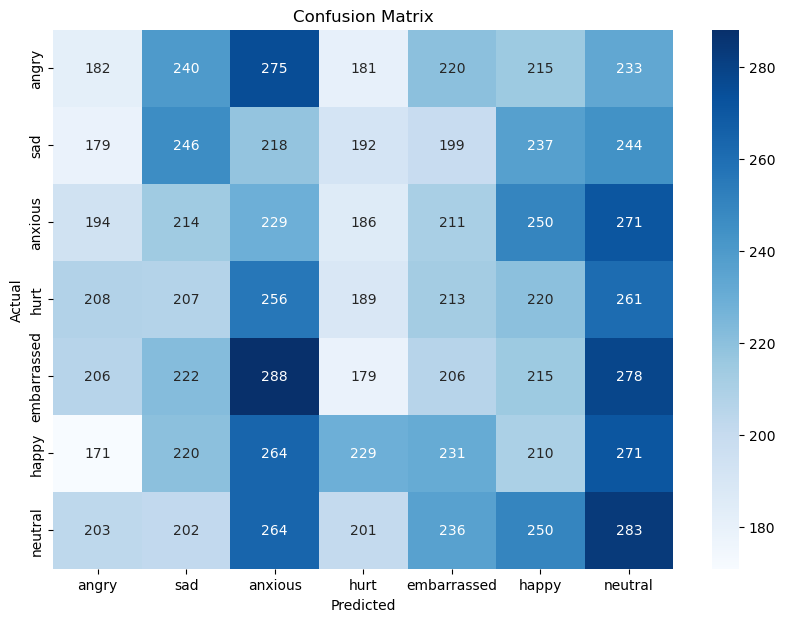

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
emotions_english = ["angry", "sad", "anxious", "hurt", "embarrassed", "happy", "neutral"]

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions_english, yticklabels=emotions_english)

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()